In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv
/kaggle/input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style('dark')

In [3]:
ball_by_ball=pd.read_csv("../input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv")
matches=pd.read_csv("../input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv",parse_dates=['date'])

In [4]:
matches['year']=matches.date.dt.to_period("y")
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [5]:
matches.tail()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon,2020


In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               816 non-null    int64         
 1   city             803 non-null    object        
 2   date             816 non-null    datetime64[ns]
 3   player_of_match  812 non-null    object        
 4   venue            816 non-null    object        
 5   neutral_venue    816 non-null    int64         
 6   team1            816 non-null    object        
 7   team2            816 non-null    object        
 8   toss_winner      816 non-null    object        
 9   toss_decision    816 non-null    object        
 10  winner           812 non-null    object        
 11  result           812 non-null    object        
 12  result_margin    799 non-null    float64       
 13  eliminator       812 non-null    object        
 14  method           19 non-null     object   

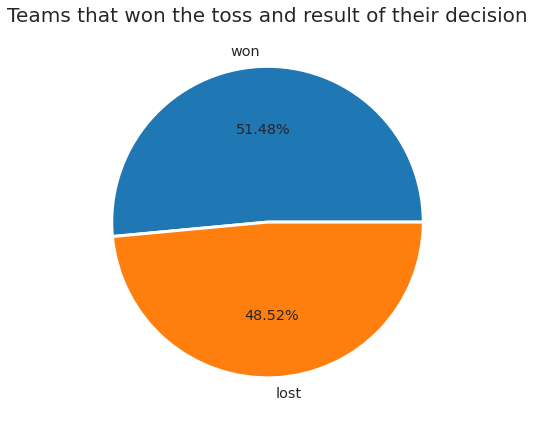

In [7]:
x=matches[matches.toss_winner==matches.winner].winner.value_counts().sum()
y=matches[matches.toss_winner!=matches.winner].winner.value_counts().sum()
fig,ax=plt.subplots(figsize=(6,6))
ax.pie([x,y],labels=("won","lost"),autopct="%.2f%%",wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
ax.set_title("Teams that won the toss and result of their decision",fontsize=20)
plt.tight_layout()

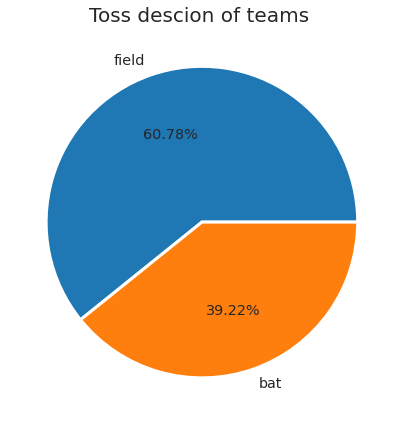

In [8]:
fig,ax=plt.subplots(figsize=(6,6))
ax.pie(list(matches.toss_decision.value_counts()),
       labels=list(matches.toss_decision.value_counts().index),autopct='%.2f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
ax.set_title("Toss descion of teams ",fontsize=20)
plt.tight_layout()


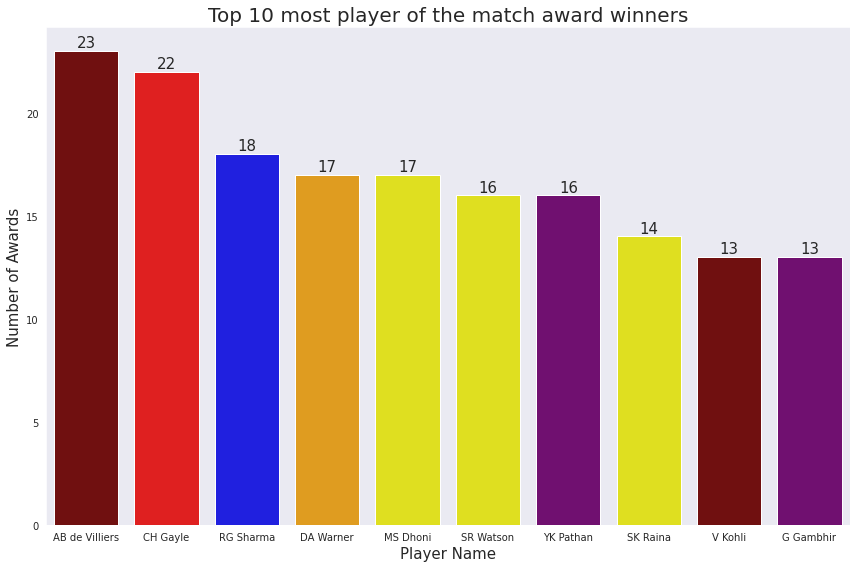

In [9]:
x=list(matches.player_of_match.value_counts().sort_values(ascending=False)[:10].index)
y=list(matches.player_of_match.value_counts().sort_values(ascending=False)[:10])
plt.figure(figsize=(12,8))
color=["maroon",'red','blue','orange','yellow','yellow','purple','yellow','maroon','purple']
plots=sns.barplot(x,y,palette=color)
for p in plots.patches:
    plots.annotate(int(p.get_height()),(p.get_x()+p.get_width()/2,p.get_height()),xytext=(0,8),size=15,textcoords="offset points",ha="center",va="center")
plt.title("Top 10 most player of the match award winners",fontsize=20)
plt.xlabel("Player Name",fontsize=15)
plt.ylabel("Number of Awards",fontsize=15)
plt.tight_layout()

In [10]:
matches.replace({"Rising Pune Supergiant":"Rising Pune Supergiants","Delhi Daredevils":"Delhi Capitals"},inplace=True)

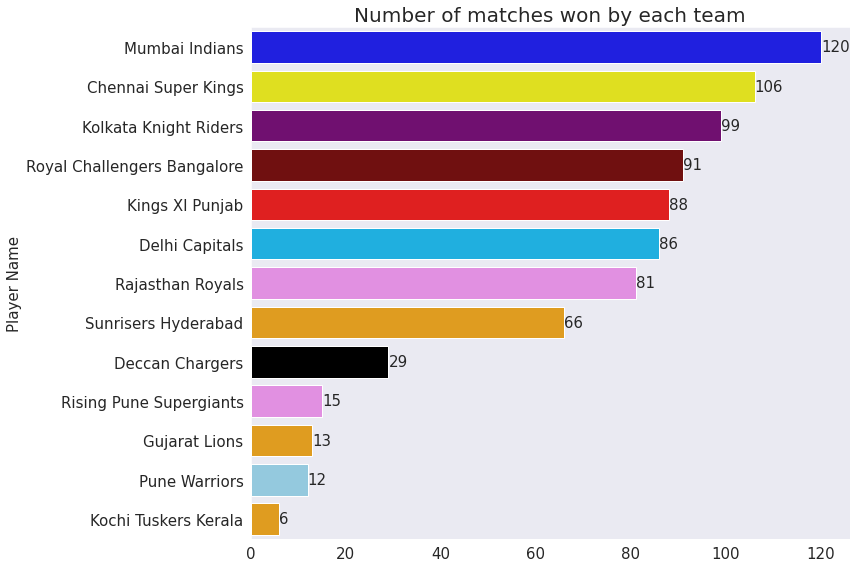

In [11]:
x=list(matches.winner.value_counts().index)
y=list(matches.winner.value_counts())
plt.figure(figsize=(12,8))
color=["blue",'yellow','purple','maroon','red','deepskyblue','violet','orange','black','violet','orange','skyblue','orange']
plots=sns.barplot(y,x,palette=color)
#for p in plots.patches:
    #plots.annotate(int(p.get_height()),(p.get_x()+p.get_width()/2,p.get_height()),xytext=(0,8),size=15,textcoords="offset points",ha="center",va="center")
plots.bar_label(plots.containers[0],fontsize=15)
plt.title("Number of matches won by each team",fontsize=20)
plt.ylabel("Player Name",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

In [12]:

ball_by_ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [13]:
ball_by_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [14]:

ball_by_ball[ball_by_ball["batsman"]=="RG Sharma"].groupby("id")["batsman_runs"].sum().sort_values(ascending=False)


id
548363     109
829705      98
1136574     94
501221      87
980957      85
          ... 
829721       0
980941       0
1082602      0
1136581      0
335986       0
Name: batsman_runs, Length: 194, dtype: int64

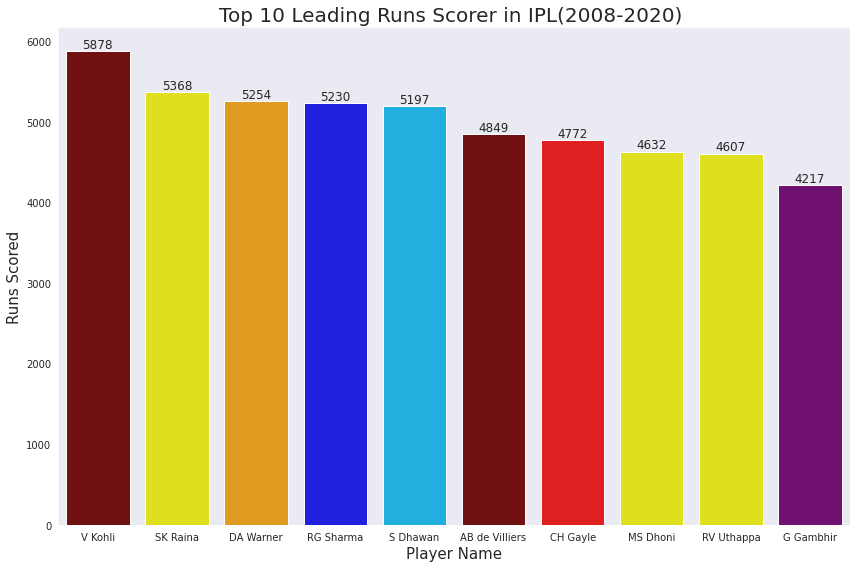

In [15]:
x=ball_by_ball.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False)[:10].index
y=ball_by_ball.groupby("batsman")["batsman_runs"].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12,8))
color=["maroon",'yellow','orange','blue','deepskyblue','maroon','red','yellow','yellow','purple']
plots=sns.barplot(x,y,palette=color)
plots.bar_label(plots.containers[0],fontsize=12)
plt.xlabel("Player Name",fontsize=15)
plt.ylabel("Runs Scored",fontsize=15)
plt.title("Top 10 Leading Runs Scorer in IPL(2008-2020) ",fontsize=20)
plt.tight_layout()


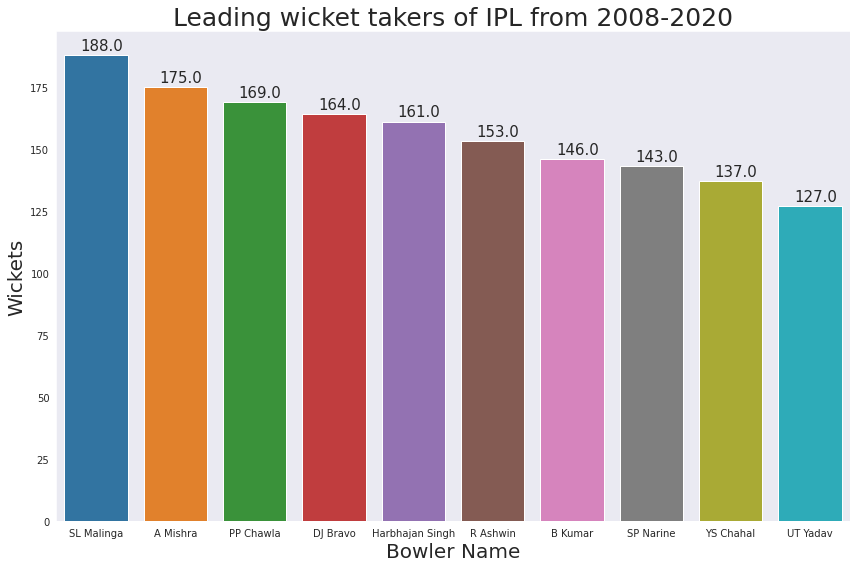

In [16]:
x=ball_by_ball[(ball_by_ball['is_wicket']==1) & (ball_by_ball['dismissal_kind']!="run out")].groupby('bowler')["is_wicket"].sum().sort_values(ascending=False)[:10].index
y=ball_by_ball[(ball_by_ball["is_wicket"]==1) & (ball_by_ball["dismissal_kind"]!="run_out")].groupby("bowler")["is_wicket"].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12,8))
plots=sns.barplot(x,y)
for p in plots.patches:
    plots.annotate(p.get_height(),(p.get_x()+p.get_width()/4,p.get_height()),
                   xytext=(0,5),textcoords="offset points",size=15)
plt.xlabel("Bowler Name",fontsize=20)
plt.ylabel("Wickets",fontsize=20)
plt.title("Leading wicket takers of IPL from 2008-2020",fontsize=25)
plt.tight_layout()

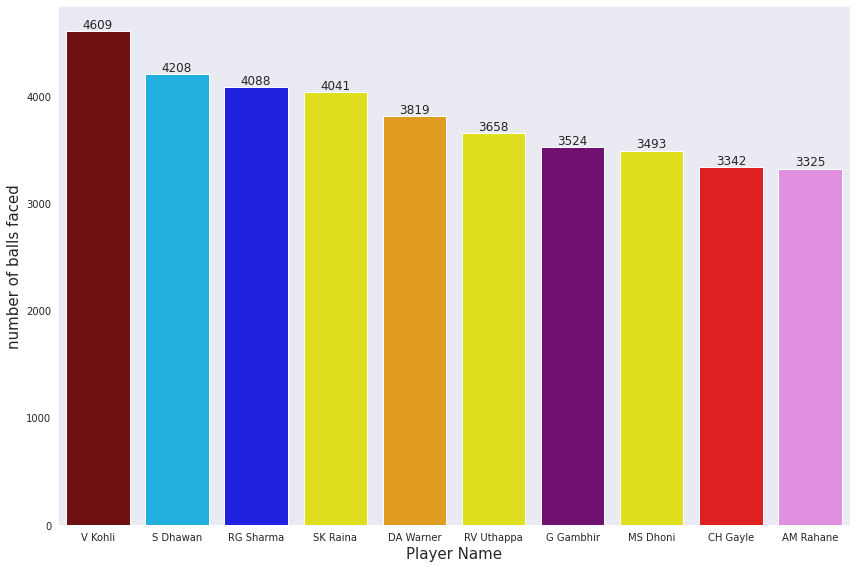

In [17]:
x=ball_by_ball["batsman"].value_counts().sort_values(ascending=False)[:10].index
y=ball_by_ball["batsman"].value_counts().sort_values(ascending=False)[:10]
plt.figure(figsize=(12,8))
color=["maroon",'deepskyblue','blue','yellow','orange','yellow','purple','yellow','red','violet']
plots=sns.barplot(x,y,palette=color)
plots.bar_label(plots.containers[0],fontsize=12)

plt.xlabel("Player Name",fontsize=15)
plt.ylabel("number of balls faced",fontsize=15)
plt.tight_layout()


In [18]:
ball_by_ball["bowler"].value_counts().sort_values(ascending=False)[:10]


Harbhajan Singh    3451
R Ashwin           3327
PP Chawla          3285
A Mishra           3233
SL Malinga         2974
DJ Bravo           2846
SP Narine          2824
B Kumar            2795
RA Jadeja          2759
UT Yadav           2642
Name: bowler, dtype: int64

In [19]:
def get_player_stats(player_name,data):
    
    runs=data[data['batsman']==player_name].batsman_runs.sum()
    balls_faced=data[data['batsman']==player_name].shape[0]
    strike_rate=(runs/balls_faced)*100
    wickets=data[(data['bowler']==player_name) & (data['dismissal_kind']!="run out")].is_wicket.sum()
    innings1=data[data['batsman']==player_name].groupby("inning")['batsman_runs'].sum()[1]
    innings2=data[data['batsman']==player_name].groupby("inning")['batsman_runs'].sum()[2]
    fours=data[data['batsman']==player_name].batsman_runs.value_counts()[4]
    sixes=fours=data[data['batsman']==player_name].batsman_runs.value_counts()[6]
    innings=len(list(data[data['batsman']==player_name].id.unique()))
    dismissed=data[(data['batsman']==player_name) & (data['player_dismissed']==player_name)].shape[0]
    not_outs=innings-dismissed
    average=runs/dismissed
    scores=data[data['batsman']==player_name].groupby('id')['batsman_runs'].sum().sort_values(ascending=False)
    
    highest_score=data[data['batsman']==player_name].groupby('id')['batsman_runs'].sum().sort_values(ascending=False)[:1].values
    return runs,wickets,innings1,innings2,balls_faced,strike_rate,innings,dismissed,not_outs,average,highest_score[0]
    

In [20]:
get_player_stats("RG Sharma",ball_by_ball)

(5230,
 15,
 3043,
 2187,
 4088,
 127.93542074363992,
 194,
 166,
 28,
 31.50602409638554,
 109)

In [21]:
get_player_stats("V Kohli",ball_by_ball)

(5878,
 4,
 3158,
 2720,
 4609,
 127.53308743762204,
 184,
 153,
 31,
 38.41830065359477,
 113)

In [22]:
ball_by_ball.batsman_runs.value_counts()

0    77637
1    71937
4    21908
2    12408
6     8902
3      616
5       60
Name: batsman_runs, dtype: int64